<a href="https://colab.research.google.com/github/Ivano05/Practico-2022-/blob/main/IVANO_Examen_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





In [2]:
# Tratamiento de datos
import pandas as pd #Para leer y escribir datos en diferentes formatos
import numpy as np #Para manejar y generar datos


# Gráficos
import matplotlib.pyplot as plt #Pyplot funciones sencillas para añadir elementos a los ejes de un gráfico.
from matplotlib import style #Para hacer mas amigable los graficos
import seaborn as sns #Libreria basada en matplotlib para dibujar graficos estaticos

# Preprocesado y modelado
import tensorflow as tf 
import tensorflow_datasets as tfds


from scipy.stats import pearsonr #se usa para encontrar el coeficiente de correlación de Pearson, 
#que representa relaciones lineales entre dos variables. También da el valor p para probar la no correlación.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #Dividir arreglos o matrices en subconjuntos aleatorios de entrenamiento y prueba.

from sklearn.metrics import r2_score #Funcion que puntua la regresión 
from sklearn.metrics import mean_squared_error #función que calcula el error cuadrático medio , una métrica de riesgo correspondiente 
#al valor esperado del error o pérdida al cuadrado (cuadrático).
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# =============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [3]:
# Datos
# ==============================================================================
#PONER CODIGO AQUI
# Genero una base de datos randon para trabajar

from sklearn.datasets import make_regression
n_samples,n_features = 1000, 5
rng = np.random.RandomState(0)
X,y = make_regression(n_samples, n_features, noise = 10, random_state=rng)



In [4]:
datos_creados = np.c_[X,y]
# Les voy asignar encabezados a las columnas para terminar de armar el dataset

datos = pd.DataFrame(datos_creados, columns = ['tv', 'radio', 'periodico', 'redes', 'grafica', 'ventas'])

datos

,tv,radio,periodico,redes,grafica,ventas
0,-1.718650,0.969624,0.196770,0.143464,-1.056957,-18.793739
1,-0.998192,-1.004323,-0.766705,-1.067742,-1.373043,-209.202089
2,-1.652804,0.174680,-1.400256,0.063896,1.065927,-40.190887
3,-0.422315,0.892474,0.555963,0.228053,0.104714,51.843160
4,-1.023173,0.177158,0.976382,-0.911881,0.106720,-81.601143
...,...,...,...,...,...,...
995,-0.072073,1.665450,2.599867,0.862707,0.884115,219.933596
996,0.945539,0.182100,-0.526243,1.510525,-0.201385,128.914396
997,0.765002,0.030386,0.707135,-2.256250,0.867665,-77.709960
998,-0.704341,0.374948,-0.999278,-0.627299,1.074704,-12.600054


Verificamos si las variables sean independientes entre sí y que no esten correlacionadas entre ellas, para evitar la colinealeidad. Lo hacemos visible en un gráfico para facilitar el análisis.


In [5]:
# Correlación entre columnas numéricas

# Correlaciono variables a los fines de identificar cuales pueden ser los mejores predictores para el modelo
#  tambíen con esto puedo detectar colinealeidad entre los predictores

# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

# Pido que me muestre las primeras 10 ya que luego voy a visualizar la correlación de mejor forma en el gráfico. 

,variable_1,variable_2,r,abs_r
31,ventas,radio,0.613060,0.613060
11,radio,ventas,0.613060,0.613060
33,ventas,redes,0.605504,0.605504
23,redes,ventas,0.605504,0.605504
5,tv,ventas,0.375828,0.375828
30,ventas,tv,0.375828,0.375828
34,ventas,grafica,0.288919,0.288919
29,grafica,ventas,0.288919,0.288919
17,periodico,ventas,0.127158,0.127158
32,ventas,periodico,0.127158,0.127158


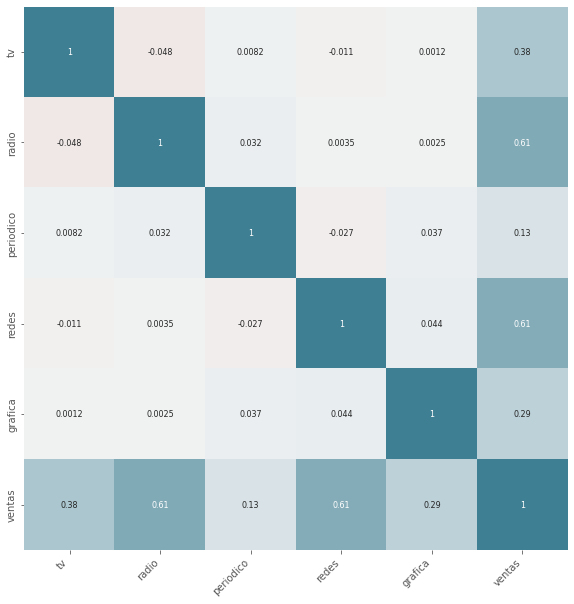

In [6]:
# Heatmap matriz de correlaciones
# ==============================================================================

#Función para convertir una matriz de correlación de pandas en formato tidy
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

No puede observarse que haya correlación significativas entre las variables independientes ya que los valores de r son inferiones a 0.05, tanto como para correlaciones positivas como negativas.

Analizando el gráfico veo que las variables que mejor se correlacionan de forma positiva con la variable objetivo son las variables de Redes y Radio.






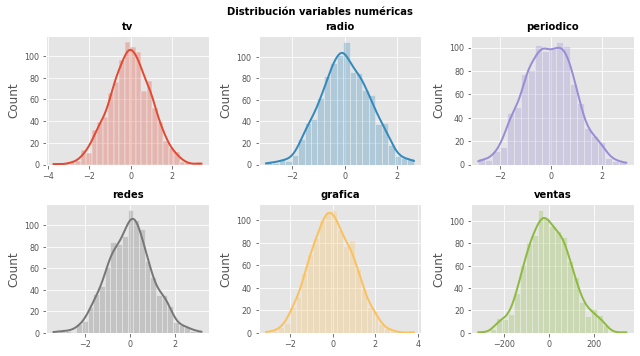

In [7]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Obserbo que la distribución es normal para todas las variables numéricas y que se esten dando de esta forma esta determinada debido a que los datos generados no tienen ruido.

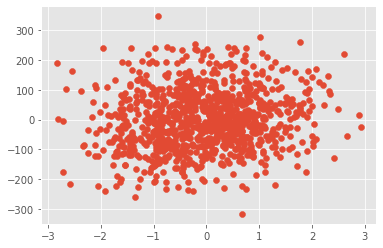

In [8]:
plt.scatter(datos['periodico'],datos['ventas'])

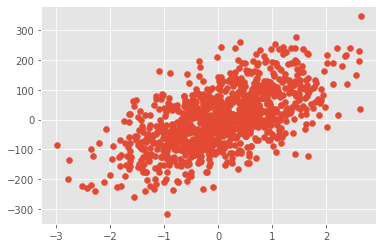

In [9]:
plt.scatter(datos['radio'],datos['ventas'])

Genero dos graficos para ver como se distribuyen los puntos y así ver si hay una tendencia en el comportamiento de las variables. Eligo las variables a representar tomando la que segun el grafico anterior mejor y peor correlación identifique. 
Como la peor tomo periodico y puedo ver que la dispersión de puntos no es clara, esta concentrada en el medio y tienendo en cuenta la densidad de los puntos puedo observar una leve tendencia, lo cual se condice con el indice de correlacion 0.13 antes observado. 
Como mejor variable correlacionada tomo radio y allí veo que hay una clara tendencia en la distribicion de los puntos donde se observa la fuerte correlación positiva.


In [10]:
# División de los datos en train y test
# ==============================================================================
X = datos[['tv', 'radio', 'periodico', 'redes', 'grafica']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size = 0.8,
                                        random_state = 1234,
                                        shuffle = True
)
#PONER CODIGO AQUI

# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(
#                     np.hstack((X_train, y_train)),
#                     columns=[]
#               )
# modelo = smf.ols(formula = 'ventas ~ tv + radio + periodico', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo =sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.630e+04
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:13:15   Log-Likelihood:                -2965.2
No. Observations:                 800   AIC:                             5942.
Df Residuals:                     794   BIC:                             5971.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2780      0.351      0.792      0.4

1 - El modelo usado es OLS debido a que es considerado uno de los mas eficaces  ya que da la mejor aproximación de la verdadera línea de regresión de la población. 
2 - Vemos que se trabajo sobre 800 observaciones 
3 - DF Residuals es el grado de libertad y se refiere al número de observaciones independientes a partir de las cuales se calcula la suma de los cuadrados. Lo calculo tomando el nº de muestras - la cantidad de variables + 1.
4 - Coef:  Los términos constantes son la intersección de la línea de regresión. De la línea de regresión (eq…1) la intersección es 0.2780. El intercepto indica el valor promedio de variables omitidas y el ruido presente en el modelo.
5 - Término de coeficiente: El término de coeficiente indica el cambio en la variable dependiente (Y) para una unidad de cambio en la variable independiente (X), Por ejemplo si Radio aumenta en 1 unidad, entonces Y aumenta en 66.62. 
6 - Std Err: Es error estándar o desviación estándar, muestra la variabilidad de muestreo de estos parámetros.
7 - t – statistics: Al ser diferente de 0 suponemos que la X tiene un impacto significativo sobre la Y
8 - p – values El valor p es la probabilidad de rechazar la hipótesis nula.
9 - Confidence intervals: Para el intervalo de confianza el 5% es el nivel de significación estándar. Al calcular los valores de p, rechazamos la hipótesis nula. Si encontramos 0 en los intervalos, no podemos rechazar la hipótesis nula. 
10 - R – squared value: Es el coeficiente de determinación que nos dice que tanta variación porcentual de la variable independiente puede ser explicada por la variable independiente. Aquí, el 99,0 % de variación en Y puede explicarse por X. El valor máximo posible de R 2   puede ser 1, lo que significa que cuanto mayor sea el valor de R 2  , mejor será la regresión.
11 - F – statistic: La prueba F dice la bondad de ajuste de una regresión. La prueba es similar a la prueba t u otras pruebas que hacemos para la hipótesis. 

Términos que no se utilizan con frecuencia:

Skewness y Kurtosis: hablan sobre la distribución de datos. La asimetría y la curtosis para la distribución normal son 0 y 3 respectivamente. La prueba de Jarque-Bera se utiliza para comprobar si un error tiene una distribución normal o no.  

Curtosis: una curtosis grande implica una mayor concentración de valores de la variable tanto muy cerca de la media de la distribución (pico) como muy lejos de ella (colas), al tiempo que existe una relativamente menor frecuencia de valores intermedios. Esto explica una forma de la distribución de frecuencias/probabilidad con colas más gruesas, con un centro más apuntado y una menor proporción de valores intermedios entre el pico y colas.







In [11]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train = prediccion_train - y_train



IndexError: ignored

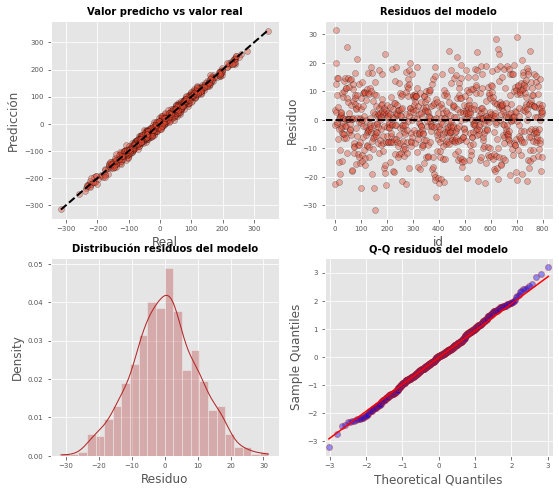

In [15]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");